In [1]:
#001 code3-112 モジュール
import pandas as pd
import numpy as np
from scipy import stats

import statsmodels.api as sm

from graphviz import Digraph

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=[12,9]
plt.rcParams['font.size']=14


In [2]:
#002 code3-113 データの読み込み
# import pandas as pd
# import os

# dir_path = 'C:/Users/yoshikoshi/python_y/Num_3_predict/01_output'
# #dir_path = 'C:\Users\yoshikoshi\python_y\Num_3_predict\01_output'
# file_name ='Num_3_2018_2022.csv'
# dataset = os.path.join(dir_path,file_name)

#path /workdir/ がないため\\\
dataset='/workdir/Num_3_predict/01_output/Num_3_2018_2022.csv'
df=pd.read_csv(dataset)
df

,date,Lottery_result,hundreds_place,tens_place,ones_place,kaibetu,day_of_week,day_name,trend,Sunday,...,num_0,num_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9
0,2018-01-04,858,8,5,8,4827,3,Thursday,1,0,...,0,0,0,0,0,1,0,0,2,0
1,2018-01-05,384,3,8,4,4828,4,Friday,2,0,...,0,0,0,1,1,0,0,0,1,0
2,2018-01-08,976,9,7,6,4829,0,Monday,3,0,...,0,0,0,0,0,0,1,1,0,1
3,2018-01-09,930,9,3,0,4830,1,Tuesday,4,0,...,1,0,0,1,0,0,0,0,0,1
4,2018-01-10,634,6,3,4,4831,2,Wednesday,5,0,...,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,2022-12-26,857,8,5,7,6112,0,Monday,1286,0,...,0,0,0,0,0,1,0,1,1,0
1286,2022-12-27,929,9,2,9,6113,1,Tuesday,1287,0,...,0,0,1,0,0,0,0,0,0,2
1287,2022-12-28,958,9,5,8,6114,2,Wednesday,1288,0,...,0,0,0,0,0,1,0,0,1,1
1288,2022-12-29,194,1,9,4,6115,3,Thursday,1289,0,...,0,1,0,0,1,0,0,0,0,1


In [5]:
#003 不要な列を削除
df_new=df.drop(['kaibetu','day_of_week','day_name','trend',
                'Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday',
                'h_0','h_1','h_2','h_3','h_4','h_4','h_5','h_6','h_7','h_8','h_9',
                't_0','t_1','t_2','t_3','t_4','t_5','t_6','t_7','t_8','t_9',
                'o_0','o_1','o_2','o_3','o_4','o_5','o_6','o_7','o_8','o_9',
                'num_0','num_1','num_2','num_3','num_4','num_5','num_6','num_7','num_8','num_9'],axis=1)
df_new

,date,Lottery_result,hundreds_place,tens_place,ones_place
0,2018-01-04,858,8,5,8
1,2018-01-05,384,3,8,4
2,2018-01-08,976,9,7,6
3,2018-01-09,930,9,3,0
4,2018-01-10,634,6,3,4
...,...,...,...,...,...
1285,2022-12-26,857,8,5,7
1286,2022-12-27,929,9,2,9
1287,2022-12-28,958,9,5,8
1288,2022-12-29,194,1,9,4


In [6]:
#004 indexを日付けに
df=df_new.set_index('date')
df

,Lottery_result,hundreds_place,tens_place,ones_place
date,,,,
2018-01-04,858,8,5,8
2018-01-05,384,3,8,4
2018-01-08,976,9,7,6
2018-01-09,930,9,3,0
2018-01-10,634,6,3,4
...,...,...,...,...
2022-12-26,857,8,5,7
2022-12-27,929,9,2,9
2022-12-28,958,9,5,8


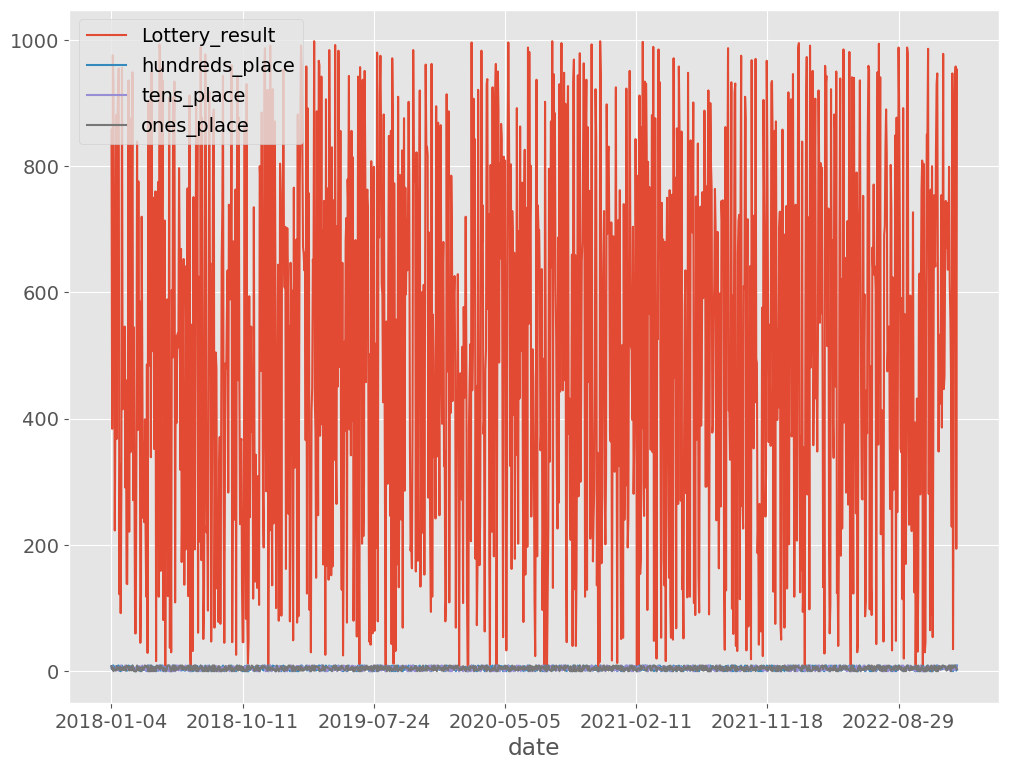

In [7]:
#005 code3-114 グラフ
df.plot()
plt.show()


In [8]:
#006 code3-115 標準化(平均0,分散1)
df_std=stats.zscore(df)
df_std

,Lottery_result,hundreds_place,tens_place,ones_place
date,,,,
2018-01-04,1.189385,1.165232,0.170962,1.192733
2018-01-05,-0.426407,-0.545225,1.236379,-0.179202
2018-01-08,1.591628,1.507323,0.881240,0.506765
2018-01-09,1.434822,1.507323,-0.539316,-1.551138
2018-01-10,0.425804,0.481049,-0.539316,-0.179202
...,...,...,...,...
2022-12-26,1.185976,1.165232,0.170962,0.849749
2022-12-27,1.431413,1.507323,-0.894455,1.535717
2022-12-28,1.530269,1.507323,0.170962,1.192733


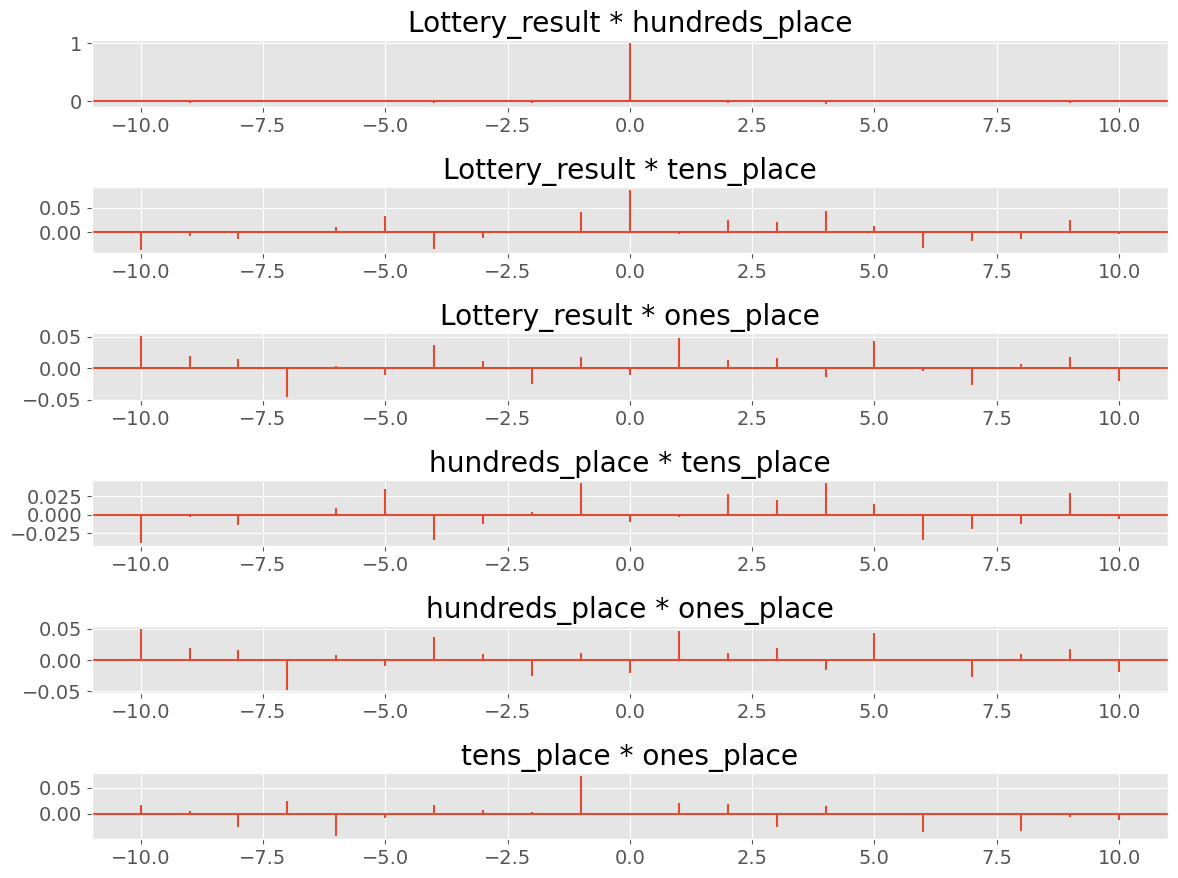

In [11]:
#007 code3-116 相互送還コレログラム
fig,ax=plt.subplots(6,1)

ax[0].xcorr(df_std.iloc[:,0],df_std.iloc[:,1])
ax[0].title.set_text(str(df_std.columns[0]+' * '+df_std.columns[1]))

ax[1].xcorr(df_std.iloc[:,0],df_std.iloc[:,2])
ax[1].title.set_text(str(df_std.columns[0]+' * '+df_std.columns[2]))

ax[2].xcorr(df_std.iloc[:,0],df_std.iloc[:,3])
ax[2].title.set_text(str(df_std.columns[0]+' * '+df_std.columns[3]))

ax[3].xcorr(df_std.iloc[:,1],df_std.iloc[:,2])
ax[3].title.set_text(str(df_std.columns[1]+' * '+df_std.columns[2]))

ax[4].xcorr(df_std.iloc[:,1],df_std.iloc[:,3])
ax[4].title.set_text(str(df_std.columns[1]+' * '+df_std.columns[3]))

ax[5].xcorr(df_std.iloc[:,2],df_std.iloc[:,3])
ax[5].title.set_text(str(df_std.columns[2]+' * '+df_std.columns[3]))

fig.tight_layout()
plt.show()

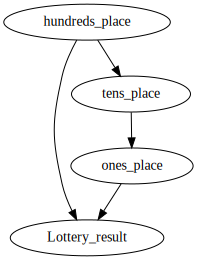

In [13]:
#008 code3-117 有向グラフ
guraph=Digraph()
for i in range(len(df.columns)):
    guraph.node(df.columns[i])

guraph.edge(df.columns[1],df.columns[0])
guraph.edge(df.columns[1],df.columns[2])
guraph.edge(df.columns[2],df.columns[3])
guraph.edge(df.columns[3],df.columns[0])

guraph

In [ ]:
#データの持つ特徴を視覚的に把握できた

In [14]:
#009 code3-118 VARモデル　
#モジュール読み込み
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.vector_ar.svar_model import SVAR

from graphviz import Digraph

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=[12,9]
plt.rcParams['font.size']=14

In [15]:
#010 code3-119 データの読み込み
dataset='/workdir/Num_3_predict/01_output/Num_3_2018_2022.csv'
df=pd.read_csv(dataset)
df

,date,Lottery_result,hundreds_place,tens_place,ones_place,kaibetu,day_of_week,day_name,trend,Sunday,...,num_0,num_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9
0,2018-01-04,858,8,5,8,4827,3,Thursday,1,0,...,0,0,0,0,0,1,0,0,2,0
1,2018-01-05,384,3,8,4,4828,4,Friday,2,0,...,0,0,0,1,1,0,0,0,1,0
2,2018-01-08,976,9,7,6,4829,0,Monday,3,0,...,0,0,0,0,0,0,1,1,0,1
3,2018-01-09,930,9,3,0,4830,1,Tuesday,4,0,...,1,0,0,1,0,0,0,0,0,1
4,2018-01-10,634,6,3,4,4831,2,Wednesday,5,0,...,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,2022-12-26,857,8,5,7,6112,0,Monday,1286,0,...,0,0,0,0,0,1,0,1,1,0
1286,2022-12-27,929,9,2,9,6113,1,Tuesday,1287,0,...,0,0,1,0,0,0,0,0,0,2
1287,2022-12-28,958,9,5,8,6114,2,Wednesday,1288,0,...,0,0,0,0,0,1,0,0,1,1
1288,2022-12-29,194,1,9,4,6115,3,Thursday,1289,0,...,0,1,0,0,1,0,0,0,0,1


In [16]:
#011 不要な列を削除
df_new=df.drop(['kaibetu','day_of_week','day_name','trend',
                'Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday',
                'h_0','h_1','h_2','h_3','h_4','h_4','h_5','h_6','h_7','h_8','h_9',
                't_0','t_1','t_2','t_3','t_4','t_5','t_6','t_7','t_8','t_9',
                'o_0','o_1','o_2','o_3','o_4','o_5','o_6','o_7','o_8','o_9',
                'num_0','num_1','num_2','num_3','num_4','num_5','num_6','num_7','num_8','num_9'],axis=1)
df_new

,date,Lottery_result,hundreds_place,tens_place,ones_place
0,2018-01-04,858,8,5,8
1,2018-01-05,384,3,8,4
2,2018-01-08,976,9,7,6
3,2018-01-09,930,9,3,0
4,2018-01-10,634,6,3,4
...,...,...,...,...,...
1285,2022-12-26,857,8,5,7
1286,2022-12-27,929,9,2,9
1287,2022-12-28,958,9,5,8
1288,2022-12-29,194,1,9,4


In [17]:
#012 indexを日付けに
df=df_new.set_index('date')
df

,Lottery_result,hundreds_place,tens_place,ones_place
date,,,,
2018-01-04,858,8,5,8
2018-01-05,384,3,8,4
2018-01-08,976,9,7,6
2018-01-09,930,9,3,0
2018-01-10,634,6,3,4
...,...,...,...,...
2022-12-26,857,8,5,7
2022-12-27,929,9,2,9
2022-12-28,958,9,5,8


In [22]:
#013 code3-120 単位根検定
for i in range(len(df.columns)):
    c_results=adfuller(df.iloc[:,i],regression='c')

    print(df.columns[i],'\t',c_results[4])    #[1]を[4]に更新

Lottery_result 	 {'1%': -3.435433297366533, '5%': -2.863784847800804, '10%': -2.5679651739400224}
hundreds_place 	 {'1%': -3.435433297366533, '5%': -2.863784847800804, '10%': -2.5679651739400224}
tens_place 	 {'1%': -3.435433297366533, '5%': -2.863784847800804, '10%': -2.5679651739400224}
ones_place 	 {'1%': -3.435433297366533, '5%': -2.863784847800804, '10%': -2.5679651739400224}


In [44]:
#014 code3-121 VARモデル構築
maxlags=10
var_model=VAR(df)
lag=var_model.select_order(maxlags).selected_orders
print('最適なラグ:',lag['aic'],'\n')

results = var_model.fit(lag['aic'])
print(results.summary())

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


LinAlgError: 4-th leading minor of the array is not positive definite

In [ ]:
#-----VAR分析はあわないようです-----

In [45]:
#015 code3-122 クレンジャー因果性の検定
for i in range(len(df.columns)):
    for j in range(len(df.columns)):
        if i != j:
            test_results = results.test_causality(causing=i, caused=j)
            test_results.pvalue
            print(df.columns[i],'->',df.columns[j],'\t',test_results.pvalue)

NameError: name 'results' is not defined

In [43]:
#016 code3-123 有向グラフ
graph=Digraph()
for i in range(len(df.columns)):
    graph.node(df.columns[i])

for i in range(len(df.columns)):
    for j in range(len(df.columns)):
        if i != j:
            test_results = results.test_causality(causing=i, caused=j)    
            if test_results.pvalue < 0.05:
                graph.edge(df.columns[i], df.columns[j])

graph

NameError: name 'results' is not defined

In [46]:
#017 code3-124 インパルス応答関数
irf = results.irf()
irf.plot(orth=True)
plt.show()

NameError: name 'results' is not defined

In [47]:
#018 code3-125 SVARの構築
A_0 = np.array([[1, 'E','E'],['E',1,'E'],['E','E',1]])
SVAR_model = SVAR(df, svar_type='A', A = A_mat)
results = SVAR_model.fit(maxlags=3)
results.A

NameError: name 'A_mat' is not defined

In [48]:
#019 code3-126 インパルス応答関数
irf = results.irf()
irf.plot(orth=True)
plt.show()

NameError: name 'results' is not defined

In [ ]:
#-----VARモデルはあわないようです-----

In [51]:
#020 code3-127 非ガウスSVARモデル　モジュール読み込み
import pandas as pd
import numpy as np

import lingam
from lingam.utils import make_dot
from graphviz import Digraph

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=[12,9]
plt.rcParams['font.size']=14

In [52]:
#021 code3-128 データ読み込み
dataset='/workdir/Num_3_predict/01_output/Num_3_2018_2022.csv'
df=pd.read_csv(dataset)
df

,date,Lottery_result,hundreds_place,tens_place,ones_place,kaibetu,day_of_week,day_name,trend,Sunday,...,num_0,num_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9
0,2018-01-04,858,8,5,8,4827,3,Thursday,1,0,...,0,0,0,0,0,1,0,0,2,0
1,2018-01-05,384,3,8,4,4828,4,Friday,2,0,...,0,0,0,1,1,0,0,0,1,0
2,2018-01-08,976,9,7,6,4829,0,Monday,3,0,...,0,0,0,0,0,0,1,1,0,1
3,2018-01-09,930,9,3,0,4830,1,Tuesday,4,0,...,1,0,0,1,0,0,0,0,0,1
4,2018-01-10,634,6,3,4,4831,2,Wednesday,5,0,...,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,2022-12-26,857,8,5,7,6112,0,Monday,1286,0,...,0,0,0,0,0,1,0,1,1,0
1286,2022-12-27,929,9,2,9,6113,1,Tuesday,1287,0,...,0,0,1,0,0,0,0,0,0,2
1287,2022-12-28,958,9,5,8,6114,2,Wednesday,1288,0,...,0,0,0,0,0,1,0,0,1,1
1288,2022-12-29,194,1,9,4,6115,3,Thursday,1289,0,...,0,1,0,0,1,0,0,0,0,1


In [53]:
#022 不要な列を削除
df_new=df.drop(['kaibetu','day_of_week','day_name','trend',
                'Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday',
                'h_0','h_1','h_2','h_3','h_4','h_4','h_5','h_6','h_7','h_8','h_9',
                't_0','t_1','t_2','t_3','t_4','t_5','t_6','t_7','t_8','t_9',
                'o_0','o_1','o_2','o_3','o_4','o_5','o_6','o_7','o_8','o_9',
                'num_0','num_1','num_2','num_3','num_4','num_5','num_6','num_7','num_8','num_9'],axis=1)
df_new

,date,Lottery_result,hundreds_place,tens_place,ones_place
0,2018-01-04,858,8,5,8
1,2018-01-05,384,3,8,4
2,2018-01-08,976,9,7,6
3,2018-01-09,930,9,3,0
4,2018-01-10,634,6,3,4
...,...,...,...,...,...
1285,2022-12-26,857,8,5,7
1286,2022-12-27,929,9,2,9
1287,2022-12-28,958,9,5,8
1288,2022-12-29,194,1,9,4


In [54]:
#023 indexを日付けに
df=df_new.set_index('date')
df

,Lottery_result,hundreds_place,tens_place,ones_place
date,,,,
2018-01-04,858,8,5,8
2018-01-05,384,3,8,4
2018-01-08,976,9,7,6
2018-01-09,930,9,3,0
2018-01-10,634,6,3,4
...,...,...,...,...
2022-12-26,857,8,5,7
2022-12-27,929,9,2,9
2022-12-28,958,9,5,8


In [58]:
#024 code3-129 VAR-LiNGAMの構築
model = lingam.VARLiNGAM(lags=2, prune=True)
model.fit(df)
print(model.adjacency_matrices_)

LinAlgError: 4-th leading minor of the array is not positive definite

In [1]:
#025 code3-130 有向グラフ
labels= ['Lottery_result(t)','hundreds_place(t)','tens_place(t)','ones_place(t)',
         'Lottery_result(t-1)','hundreds_place(t-1)','tens_place(t-1)','ones_place(t-1)',
         'Lottery_result(t-2)','hundreds_place(t-2)','tens_place(t-2)','ones_place(t-2)']

make_dot(np.hstack(model.adjacency_matrices_),lower_limit=0.05,ignore_shape=True,labels=labels)


NameError: name 'make_dot' is not defined

In [ ]:
#-----非ガウスSVARモデルはあわないようです-----